In [4]:
import eeg_decoder
import numpy as np
from collections import OrderedDict
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
experiment_name = 'test_exp'
data_dir = f'./test_data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False)

In [97]:
time_window = 25
time_step = 25
trial_bin_size = 20
n_splits = 30
group_dict = OrderedDict([('Set size 1',[1]),('Set size 3',[3])])
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_bin_size,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub)

In [98]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.group_labels(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):
        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test) 
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)


0
1
2


In [99]:
interp = eeg_decoder.Interpreter(clfr, subtitle='1vs3')
# interp.save_results()

No handles with labels found to put in legend.


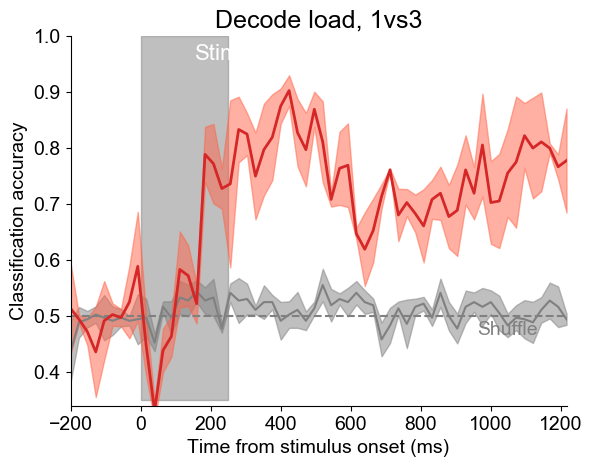

Mean delay accuracy: 0.7562330623306234
Mean delay S.D.: 0.06612750726915441


In [100]:
interp.plot_acc(significance_testing=False,savefig=False,ylim=[.34,1],chance_text_y=.23, title='Decode load, 1vs3')

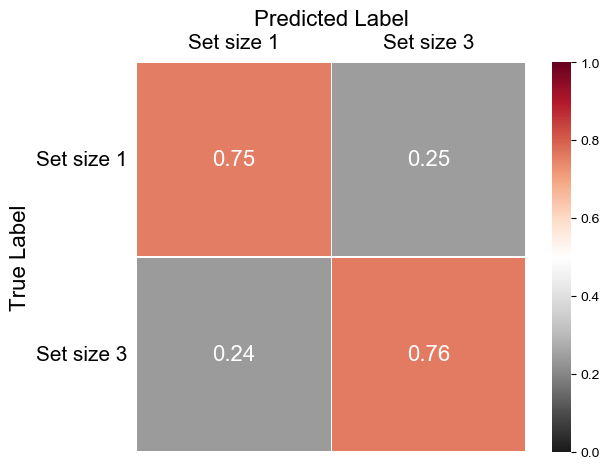

In [101]:
interp.plot_confusion_matrix()

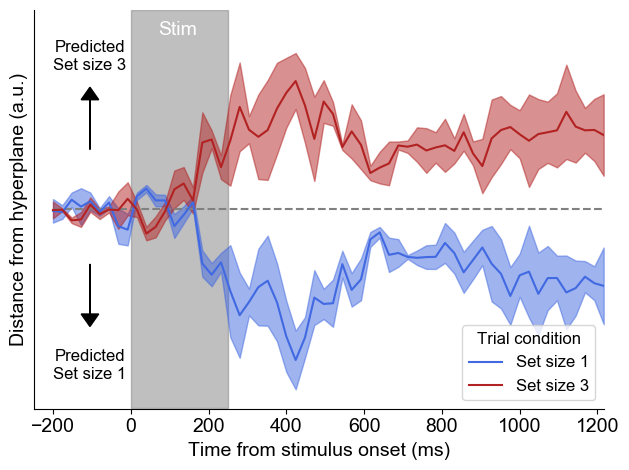

In [102]:
interp.plot_hyperplane()